In [ ]:
!pip install python-igraph
!pip install --upgrade python-igraph

In [ ]:
import igraph as ig
import pandas as pd

# Load node and edge data from CSV files
node_df = pd.read_csv('/content/MDMN_nodes.csv')  # Replace with the path to your node data file
edge_df = pd.read_csv('/content/MDMN_edges.csv')  # Replace with the path to your edge data file


# Extract node IDs and labels
node_ids = node_df['Id'].tolist()
node_labels = node_df['Label'].tolist()

# Adjust the node IDs to start from 0
adjusted_node_ids = [node_id - 1 for node_id in node_ids]

# Create an empty graph with adjusted node IDs
graph = ig.Graph(directed=False)
graph.add_vertices(adjusted_node_ids)
graph.vs['label'] = node_labels

# Extract edge pairs as tuples from the edge DataFrame
edge_pairs = list(zip(edge_df['source'], edge_df['target']))

# Adjust the edge pairs to use adjusted node IDs
adjusted_edge_pairs = [(source - 1, target - 1) for source, target in edge_pairs]

# Add edges to the graph with adjusted node IDs
graph.add_edges(adjusted_edge_pairs)

# Calculate degree centrality
degree_centrality = graph.degree()

# Calculate betweenness centrality
betweenness_centrality = graph.betweenness()

# Calculate closeness centrality
closeness_centrality = graph.closeness(normalized=True)

# Calculate eigenvalue centrality
eigen_centrality = graph.evcent()

centrality_measures = {
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Eigenvalue Centrality': eigen_centrality,
}



for node_label in node_labels:
    print("Node Label:", node_label)
    node_index = graph.vs.find(label=node_label).index
    for name, values in centrality_measures.items():
        print(name, values[node_index])
    print()

Node Label: Shaheed Sthal
Degree Centrality 1
Betweenness Centrality 0.0
Closeness Centrality 0.038648031945236735
Eigenvalue Centrality 6.1266926323908845e-09

Node Label: Hindon
Degree Centrality 2
Betweenness Centrality 270.0
Closeness Centrality 0.04019578760011866
Eigenvalue Centrality 1.927338311523859e-08

Node Label: Arthala
Degree Centrality 2
Betweenness Centrality 538.0
Closeness Centrality 0.041859746679023785
Eigenvalue Centrality 5.4503621221808724e-08

Node Label: Mohan Nagar
Degree Centrality 2
Betweenness Centrality 804.0
Closeness Centrality 0.043653350515463915
Eigenvalue Centrality 1.5218440603790184e-07

Node Label: Shyam Park
Degree Centrality 2
Betweenness Centrality 1068.0
Closeness Centrality 0.04559219380888291
Eigenvalue Centrality 4.24238914005201e-07

Node Label: Major Mohit Sharma
Degree Centrality 2
Betweenness Centrality 1330.0
Closeness Centrality 0.04769447377683914
Eigenvalue Centrality 1.1823886856070681e-06

Node Label: Raj Bagh
Degree Centrality 2


In [ ]:
for centrality_name, centrality_values in centrality_measures.items():
    print(f"--- Top 5 nodes based on {centrality_name} ---")
    sorted_nodes = sorted(graph.vs, key=lambda v: centrality_values[v.index], reverse=True)[:5]
    for i, node in enumerate(sorted_nodes, start=1):
        print(f"{i}. Node {node['label']} (ID {node.index}) - {centrality_name}: {centrality_values[node.index]:.2f}")
    print()

--- Top 5 nodes based on Degree Centrality ---
1. Node Central Secretariat (ID 45) - Degree Centrality: 7.00
2. Node Khan Market (ID 148) - Degree Centrality: 7.00
3. Node Kalkaji Mandir (ID 155) - Degree Centrality: 6.00
4. Node Kashmere Gate (ID 15) - Degree Centrality: 5.00
5. Node Netaji Subhash Place (ID 23) - Degree Centrality: 5.00

--- Top 5 nodes based on Betweenness Centrality ---
1. Node Dilli Haat - INA (ID 49) - Betweenness Centrality: 9571.43
2. Node Kashmere Gate (ID 15) - Betweenness Centrality: 9087.62
3. Node Rajouri Garden (ID 95) - Betweenness Centrality: 8701.43
4. Node Central Secretariat (ID 45) - Betweenness Centrality: 8667.48
5. Node Punjabi Bagh West (ID 123) - Betweenness Centrality: 8629.47

--- Top 5 nodes based on Closeness Centrality ---
1. Node Dilli Haat - INA (ID 49) - Closeness Centrality: 0.09
2. Node Rajiv Chowk (ID 43) - Closeness Centrality: 0.09
3. Node Central Secretariat (ID 45) - Closeness Centrality: 0.09
4. Node Patel Chowk (ID 44) - Closen

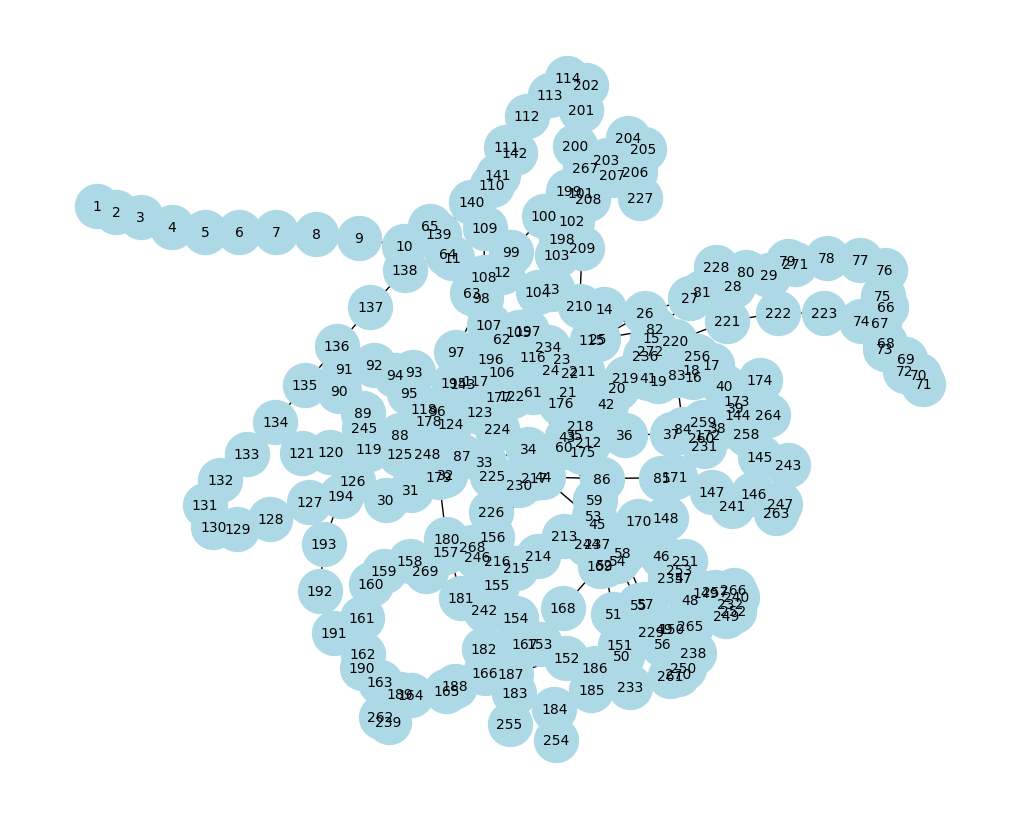

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already loaded your 'node_df' and 'edge_df' DataFrames from your CSV files.

# Create a NetworkX graph
nx_graph = nx.from_pandas_edgelist(edge_df, 'source', 'target')

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(nx_graph)  # Random layout (you can use other layout algorithms)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
plt.show()